In [141]:
# DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# helpers
%matplotlib inline

# Graphviz 
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
#import pydotplus
#import graphviz

In [142]:
# pip list

In [143]:
# !pwd
# !ls

In [144]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)

(80000, 5)


In [145]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [147]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [148]:
data.duplicated().any()

True

In [149]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [150]:
data = data.drop_duplicates()
data.duplicated().any()

False

In [151]:
data.isnull().any()
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

In [152]:
# Discretize amount - eg., 0-1000, 1001-2000, 2001+
# see pd.cut() & pd.qcut() in the Pandas_Cheat_Sheet reference 

data['amtBin'] = pd.cut(data['amount'],bins=3, labels = ["0-1000", "1000-2000", "2000-3000"])

In [153]:
data['amtBin']

0           0-1000
1           0-1000
2        1000-2000
3           0-1000
4        1000-2000
           ...    
79995       0-1000
79996    1000-2000
79997       0-1000
79998       0-1000
79999       0-1000
Name: amtBin, Length: 79979, dtype: category
Categories (3, object): ['0-1000' < '1000-2000' < '2000-3000']

In [154]:
data['ageBin'] = pd.cut(data['age'], bins = 4, labels = ["18-33", "34-49", "50-64", "65+"])

In [155]:
data['ageBin']

0        34-49
1        34-49
2        34-49
3        34-49
4        18-33
         ...  
79995      65+
79996    50-64
79997    50-64
79998    34-49
79999    18-33
Name: ageBin, Length: 79979, dtype: category
Categories (4, object): ['18-33' < '34-49' < '50-64' < '65+']

In [156]:
# add amtBin and ageBin to the dataset
data.head()

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.03,2,0-1000,34-49
1,0,35,2,219.51,2,0-1000,34-49
2,1,45,3,1525.70,4,1000-2000,34-49
3,1,46,3,715.25,3,0-1000,34-49
4,1,33,4,1937.50,1,1000-2000,18-33


In [157]:
# output statistics
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [158]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


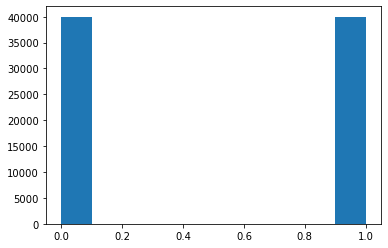

In [159]:
plt.hist(data['in-store'])
plt.show()

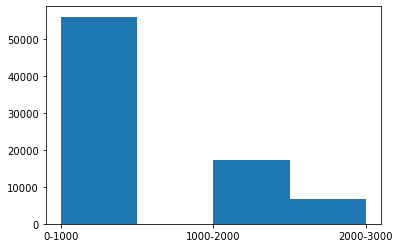

In [160]:
plt.hist(data['amtBin'], bins=4)
plt.show()

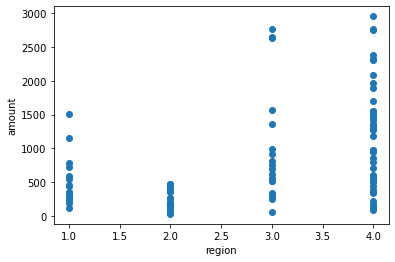

In [161]:
# Scatter plot example
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('amount')
plt.xlabel('region')
plt.show()


Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


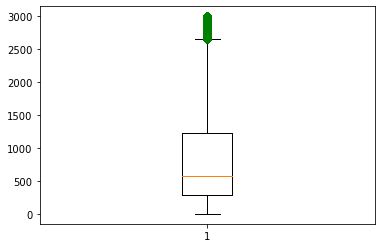

In [162]:
# Box plot example
# eval col names/features
header = data.dtypes.index
print(header)
# plot
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()


In [163]:
data.assign(Regions='')
region_dict = {
    1:'North',
    2:'South',
    3:'East',
    4:'West'
}
data['Regions'] = data['region'].map(region_dict)
data

,in-store,age,items,amount,region,amtBin,ageBin,Regions
0,0,37,4,281.03,2,0-1000,34-49,South
1,0,35,2,219.51,2,0-1000,34-49,South
2,1,45,3,1525.70,4,1000-2000,34-49,West
3,1,46,3,715.25,3,0-1000,34-49,East
4,1,33,4,1937.50,1,1000-2000,18-33,North
...,...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,0-1000,65+,North
79996,0,59,7,1932.00,3,1000-2000,50-64,East
79997,0,54,1,414.16,2,0-1000,50-64,South
79998,1,49,4,335.32,1,0-1000,34-49,North


<AxesSubplot:xlabel='Regions'>

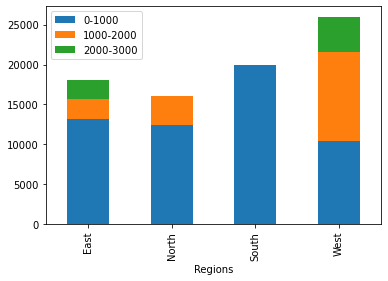

In [164]:
#stacked column example
#your code here

data.groupby('Regions')['amtBin']\
.value_counts()\
.unstack(level = 1)\
.plot.bar(stacked = True)

C:\Users\rcval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


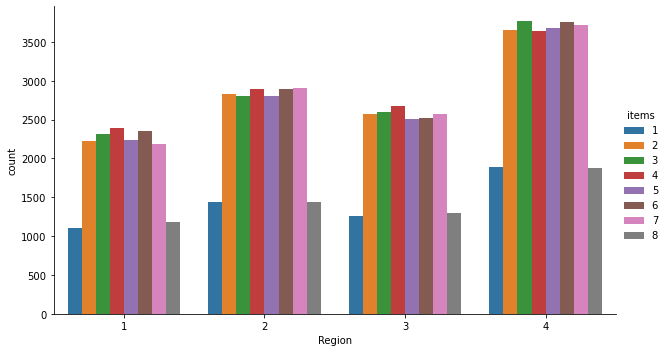

In [170]:
#other visualizations from Titanic tutorial

g = sns.catplot('region', data=data, hue='items', kind='count', aspect=1.75)
g.set_xlabels('Region')


In [171]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


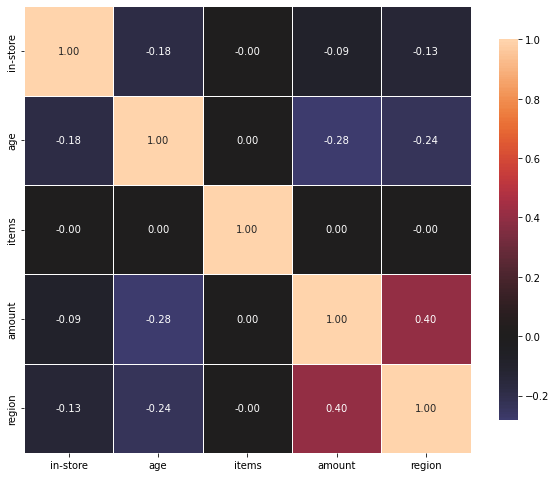

In [172]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [173]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321
